In [4]:
import pickle
import bson
import pandas as pd
import pandas as pd
import numpy as np
import os
import pickle
from bson.objectid import ObjectId
from collections import defaultdict
import timeit
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import datetime


pd.set_option('display.max_columns', None)

In [5]:
# Read pickle file
df_shots = pd.read_pickle("NCAAM1 22-23 shotsdf.pickle")

# Show the top 5 rows
display(df_shots.head())
display(df_shots.columns)


,game_id,team_id,season_id,player_id,shot_id,score,score_opp,Period,segment_id,Time,Time_Seconds,Stat,Zone,x_coordinate,y_coordinate,Angle,Distance,Jumpshot,Assisted,Red Zone,Floater,Second Chance,Layup,Paint,Drive,Blocked,ATO,Off Turnover,Off Steal,Hook Shot,Fastbreak,Pullup,And1,Turnaround,Dunk,Step Back
0,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f44ed05764db467fe48,636a5fa6531336e79c3425dd,3,2,1,636a5f91531336e79c3425b4,18:50,1130,ThreeMake,7-1,5.0,20.7,37.7,25.26,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342589,636a5fa6531336e79c3425e1,3,2,1,636a5f91531336e79c3425b4,18:11,1091,TwoMiss,4-2,21.0,20.7,75.5,15.94,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c34258a,636a5fa6531336e79c3425e3,3,2,1,636a5f91531336e79c3425b4,18:6,1086,TwoMiss,3-1,14.0,11.3,28.7,12.54,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f45ed05764db467fe4e,636a5fa6531336e79c3425e8,3,4,1,636a5f91531336e79c3425b5,17:7,1027,TwoMiss,3-2,25.0,16.9,90.0,11.67,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False
4,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342588,636a5fa6531336e79c3425ea,3,4,1,636a5f91531336e79c3425b5,16:28,988,TwoMiss,4-2,25.0,24.4,90.0,19.19,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Index(['game_id', 'team_id', 'season_id', 'player_id', 'shot_id', 'score',
       'score_opp', 'Period', 'segment_id', 'Time', 'Time_Seconds', 'Stat',
       'Zone', 'x_coordinate', 'y_coordinate', 'Angle', 'Distance', 'Jumpshot',
       'Assisted', 'Red Zone', 'Floater', 'Second Chance', 'Layup', 'Paint',
       'Drive', 'Blocked', 'ATO', 'Off Turnover', 'Off Steal', 'Hook Shot',
       'Fastbreak', 'Pullup', 'And1', 'Turnaround', 'Dunk', 'Step Back'],
      dtype='object')

In [6]:
df_games = pd.read_pickle("NCAAM1 22-23 gamesdf.pickle")

# Show the top 5 rows
display(df_games.head())
display(df_games.columns)

,game_id,season,league,date,has_locations,has_segments,team1,team2,hometeam,winning_team
0,636a5fc5531336e79c342993,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953
1,636a61967b3d0a3470cf7b1a,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af69eb,5e875e684dc25ebee5af67ef,5e875e684dc25ebee5af67ef,5e875e684dc25ebee5af67ef
2,636ac7918ab5de1c94cf9f83,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6b7f,5e875e684dc25ebee5af67ab,5e875e684dc25ebee5af6b7f,5e875e684dc25ebee5af6b7f
3,636acac88ab5de1c94cfa752,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6acb,5e875e684dc25ebee5af6a83,5e875e684dc25ebee5af6a83,5e875e684dc25ebee5af6a83
4,636c2fe1af77c98d5eb154cf,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af695f,5e875e684dc25ebee5af6a3f,5e875e684dc25ebee5af695f,5e875e684dc25ebee5af695f


Index(['game_id', 'season', 'league', 'date', 'has_locations', 'has_segments',
       'team1', 'team2', 'hometeam', 'winning_team'],
      dtype='object')

In [7]:
df_games['hometeam'].isnull().sum()

755

In [8]:
df_players = pd.read_pickle("NCAAM1 22_23 playerdictionary.pickle")
df_players = pd.DataFrame(df_players)
display(df_players.head())

,player,height,LBA_position,Genius_position,year,seasonid
0,618ff2add1901c63278a2703,78,Mid,F,Sr,63502c8a4e970ea2c1102c04
1,618ff2add1901c63278a2704,81,Big,F,So,63502c8a4e970ea2c1102c04
2,618ff2add1901c63278a2709,81,Big,F,Sr,63502c8a4e970ea2c1102c04
3,618ff2add1901c63278a270a,81,Big,F,Sr,63502c8a4e970ea2c1102c04
4,618ff2add1901c63278a270b,81,Big,F,Jr,63502c8a4e970ea2c1102c04


In [9]:
df_team = pd.read_pickle("NCAAM1 22_23 teamsdf.pickle")
display(df_team.head())

,team_id,season_id,conferenceid
0,5e875e684dc25ebee5af68bb,63502c834e970ea2c1102b52,64e4d36650f218f22c415b68
1,5e875e684dc25ebee5af68db,63502c834e970ea2c1102b5a,64e4d36650f218f22c415b69
2,5e875e684dc25ebee5af68eb,63502c834e970ea2c1102b5e,64e4d36650f218f22c415b69
3,5e875e684dc25ebee5af6943,63502c844e970ea2c1102b74,64e4d36650f218f22c415b6a
4,5e875e684dc25ebee5af6a4b,63502c874e970ea2c1102bb6,64e4d36650f218f22c415b6a


In [10]:
## Creating features

In [11]:
features_df = df_shots[['game_id', 'team_id', 'season_id', 'player_id', 'shot_id','segment_id','Distance', 'Angle', 'Zone', 'x_coordinate', 'y_coordinate', 'Period','Time_Seconds','Time','score','score_opp','Stat']].copy()

# For shot/play type, we'll take multiple columns
shot_play_type_columns = ['Jumpshot', 'Assisted', 'Red Zone', 'Floater', 'Second Chance', 'Layup', 'Paint', 'Drive', 'Blocked', 'ATO', 'Off Turnover', 'Off Steal', 'Hook Shot', 'Fastbreak', 'Pullup', 'And1', 'Turnaround', 'Dunk', 'Step Back']
features_df[shot_play_type_columns] = df_shots[shot_play_type_columns]

In [12]:
merged_df = pd.merge(features_df, df_games, on='game_id', how='left')

# Create 'Location' feature based on 'team_id' and 'hometeam'
def determine_location(row):
    if pd.isna(row['hometeam']):
        return 'Neutral'
    elif row['team_id'] == row['hometeam']:
        return 'Home'
    else:
        return 'Away'

merged_df['Location'] = merged_df.apply(determine_location, axis=1)

In [13]:
# features_df = pd.merge(features_df, merged_df[['game_id', 'team_id', 'Location']], on=['game_id', 'team_id'], how='left')

# # Now, features_df should have the 'Location' column
# display(features_df.head())

In [14]:
merged_df['Location'].value_counts()

Location
Home       309678
Away       306124
Neutral     83764
Name: count, dtype: int64

In [15]:
## Previous games trends

In [16]:
display(df_games.head())
display(merged_df.head())

,game_id,season,league,date,has_locations,has_segments,team1,team2,hometeam,winning_team
0,636a5fc5531336e79c342993,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953
1,636a61967b3d0a3470cf7b1a,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af69eb,5e875e684dc25ebee5af67ef,5e875e684dc25ebee5af67ef,5e875e684dc25ebee5af67ef
2,636ac7918ab5de1c94cf9f83,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6b7f,5e875e684dc25ebee5af67ab,5e875e684dc25ebee5af6b7f,5e875e684dc25ebee5af6b7f
3,636acac88ab5de1c94cfa752,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6acb,5e875e684dc25ebee5af6a83,5e875e684dc25ebee5af6a83,5e875e684dc25ebee5af6a83
4,636c2fe1af77c98d5eb154cf,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af695f,5e875e684dc25ebee5af6a3f,5e875e684dc25ebee5af695f,5e875e684dc25ebee5af695f


,game_id,team_id,season_id,player_id,shot_id,segment_id,Distance,Angle,Zone,x_coordinate,y_coordinate,Period,Time_Seconds,Time,score,score_opp,Stat,Jumpshot,Assisted,Red Zone,Floater,Second Chance,Layup,Paint,Drive,Blocked,ATO,Off Turnover,Off Steal,Hook Shot,Fastbreak,Pullup,And1,Turnaround,Dunk,Step Back,season,league,date,has_locations,has_segments,team1,team2,hometeam,winning_team,Location
0,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f44ed05764db467fe48,636a5fa6531336e79c3425dd,636a5f91531336e79c3425b4,25.26,37.7,7-1,5.0,20.7,1,1130,18:50,3,2,ThreeMake,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away
1,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342589,636a5fa6531336e79c3425e1,636a5f91531336e79c3425b4,15.94,75.5,4-2,21.0,20.7,1,1091,18:11,3,2,TwoMiss,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away
2,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c34258a,636a5fa6531336e79c3425e3,636a5f91531336e79c3425b4,12.54,28.7,3-1,14.0,11.3,1,1086,18:6,3,2,TwoMiss,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away
3,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f45ed05764db467fe4e,636a5fa6531336e79c3425e8,636a5f91531336e79c3425b5,11.67,90.0,3-2,25.0,16.9,1,1027,17:7,3,4,TwoMiss,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away
4,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342588,636a5fa6531336e79c3425ea,636a5f91531336e79c3425b5,19.19,90.0,4-2,25.0,24.4,1,988,16:28,3,4,TwoMiss,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,11/7/22,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away


In [17]:
df_games['date'] = pd.to_datetime(df_games['date'])
merged_df['date'] = pd.to_datetime(merged_df['date'])

C:\Users\porwa\AppData\Local\Temp\ipykernel_24400\2950306567.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_games['date'] = pd.to_datetime(df_games['date'])
C:\Users\porwa\AppData\Local\Temp\ipykernel_24400\2950306567.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['date'] = pd.to_datetime(merged_df['date'])


In [18]:
periods = [10, 5, 3, 1]

In [19]:
def compute_win_loss_ratios_for_period(df_games, team_id, period):
    """Compute win-loss ratios for a team for the given period."""
    # Filter the team's games
    team_games = df_games[(df_games['team1'] == team_id) | (df_games['team2'] == team_id)]
    
    # Sort by date
    team_games = team_games.sort_values(by='date')
    
    # Compute win flags (1 if won, 0 otherwise)
    team_games['won'] = (team_games['winning_team'] == team_id).astype(int)
    
    # Calculate rolling win sum and count
    team_games[f'wins_last_{period}'] = team_games['won'].rolling(window=period, min_periods=1).sum()
    team_games[f'games_last_{period}'] = team_games['won'].rolling(window=period, min_periods=1).count()
    
    # Calculate ratio
    team_games[f'w_l_ratio_last_{period}'] = team_games[f'wins_last_{period}'] / team_games[f'games_last_{period}']
    
    return team_games[['date', f'w_l_ratio_last_{period}']].set_index('date')

# Calculate win-loss ratios for all teams and periods in advance
team_ids = df_games['team1'].unique()
ratios_cache = {}
for team_id in team_ids:
    for period in periods:
        ratios_cache[(team_id, period)] = compute_win_loss_ratios_for_period(df_games, team_id, period)

In [20]:
def get_opponent(row):
    return row['team2'] if row['team_id'] == row['team1'] else row['team1']


In [21]:
from tqdm import tqdm

def get_ratio_from_cache_vectorized(dates, team_ids, period):
    """Vectorized function to fetch pre-calculated ratio from the cache."""
    results = []
    for date, team_id in zip(dates, team_ids):
        ratios = ratios_cache.get((team_id, period))
        if ratios is not None:
            results.append(ratios.loc[date, f'w_l_ratio_last_{period}'] if date in ratios.index else float('nan'))
        else:
            results.append(float('nan'))
    return results

for period in tqdm(periods, desc='Updating DataFrame'):
    # Team stats
    merged_df[f'w_l_ratio_last_{period}'] = get_ratio_from_cache_vectorized(merged_df['date'], merged_df['team_id'], period)
    # Opposition stats
    merged_df[f'opp_w_l_ratio_last_{period}'] = get_ratio_from_cache_vectorized(merged_df['date'], merged_df.apply(get_opponent, axis=1), period)

Updating DataFrame: 100%|██████████| 4/4 [02:58<00:00, 44.68s/it]


In [22]:
merged_df.head()
merged_df

,game_id,team_id,season_id,player_id,shot_id,segment_id,Distance,Angle,Zone,x_coordinate,y_coordinate,Period,Time_Seconds,Time,score,score_opp,Stat,Jumpshot,Assisted,Red Zone,Floater,Second Chance,Layup,Paint,Drive,Blocked,ATO,Off Turnover,Off Steal,Hook Shot,Fastbreak,Pullup,And1,Turnaround,Dunk,Step Back,season,league,date,has_locations,has_segments,team1,team2,hometeam,winning_team,Location,w_l_ratio_last_10,opp_w_l_ratio_last_10,w_l_ratio_last_5,opp_w_l_ratio_last_5,w_l_ratio_last_3,opp_w_l_ratio_last_3,w_l_ratio_last_1,opp_w_l_ratio_last_1
0,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f44ed05764db467fe48,636a5fa6531336e79c3425dd,636a5f91531336e79c3425b4,25.26,37.7,7-1,5.0,20.7,1,1130,18:50,3,2,ThreeMake,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0
1,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342589,636a5fa6531336e79c3425e1,636a5f91531336e79c3425b4,15.94,75.5,4-2,21.0,20.7,1,1091,18:11,3,2,TwoMiss,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0
2,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c34258a,636a5fa6531336e79c3425e3,636a5f91531336e79c3425b4,12.54,28.7,3-1,14.0,11.3,1,1086,18:6,3,2,TwoMiss,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0
3,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f45ed05764db467fe4e,636a5fa6531336e79c3425e8,636a5f91531336e79c3425b5,11.67,90.0,3-2,25.0,16.9,1,1027,17:7,3,4,TwoMiss,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0
4,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342588,636a5fa6531336e79c3425ea,636a5f91531336e79c3425b5,19.19,90.0,4-2,25.0,24.4,1,988,16:28,3,4,TwoMiss,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699561,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,63502c8a4e970ea2c1102c01,618dbab19a32a50e3d7afdc2,648b3a7b98debb5769861cdd,648b3a0b98debb576986198e,3.03,131.4,1,27.0,7.5,3,91,1:31,83,85,TwoMiss,False,False,True,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2023-03-01,True,True,5e875e684dc25ebee5af6b73,5e875e684dc25ebee5af6b7b,5e875e684dc25ebee5af6b73,5e875e684dc25ebee5af6b73,Away,0.3,0.8,0.4,0.8,0.333333,1.0,0.0,1.0
699562,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,63502c8a4e970ea2c1102c01,618dbab09a32a50e3d7afdbb,648b3a7b98debb5769861ce0,648b3a0b98debb576986198e,15.46,93.7,4-2,26.0,20.7,3,37,0:37,83,87,TwoMiss,True,False,False,False,False,False,False,False,False,False,False,False,False,Fal

c:\Users\porwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\porwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porwa\AppData\Local\Temp\ipykernel_24400\2209076692.py:16: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\porwa\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\porwa\AppData\Local\Temp\ipykernel_24400\2209076692.py:16: UserWarning: The fig

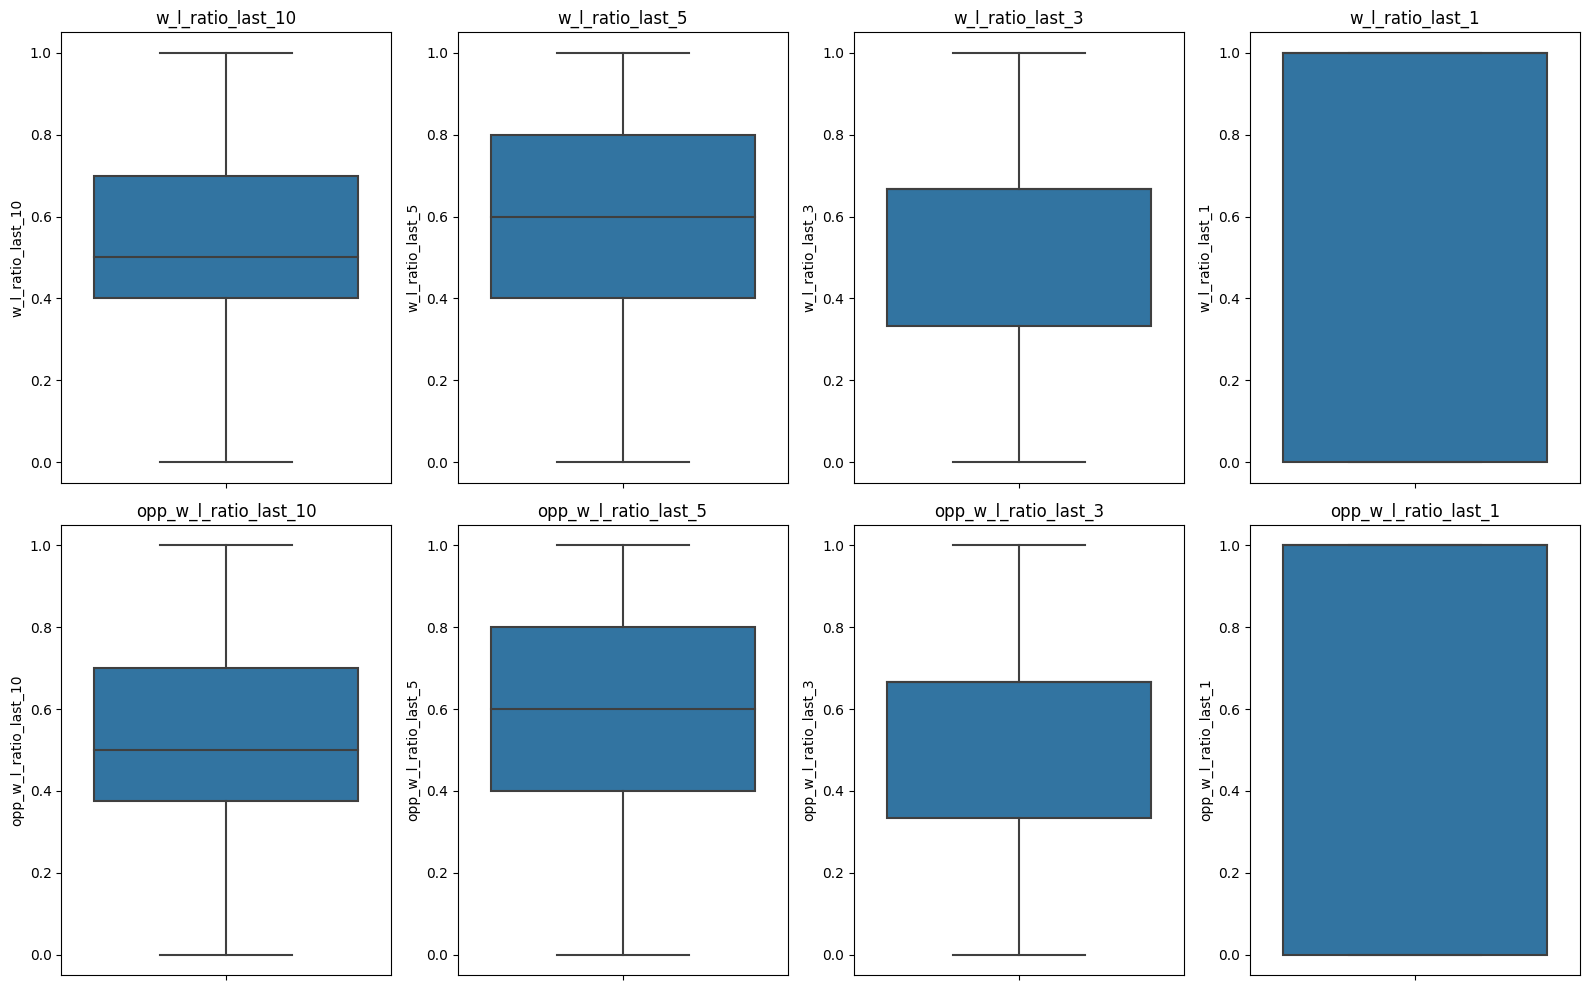

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of the feature names
features = [f'w_l_ratio_last_{period}' for period in [10, 5, 3, 1]] + \
           [f'opp_w_l_ratio_last_{period}' for period in [10, 5, 3, 1]]

# Setting up the figure and axes
plt.figure(figsize=(16, 10))

# Loop through each feature to create a subplot with a box plot
for i, feature in enumerate(features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(data=merged_df, y=feature)
    plt.title(feature)
    plt.tight_layout()

plt.show()

In [24]:
# Remove rows with no player_id
merged_df = merged_df[merged_df.player_id != False]

# Remove all the corner 3s that are registered as 2s
merged_df = merged_df[~(((merged_df.Zone == ' 4-1') & (merged_df.x_coordinate <= 3)) |
                         ((merged_df.Zone == ' 4-3') & (merged_df.x_coordinate >= 47)))]

# Remove all the above the break 3s that are registered as 2s
merged_df = merged_df[~(((merged_df.Zone == ' 4-1') | (merged_df.Zone == ' 4-3') | (merged_df.Zone == ' 4-2')) &
                         (merged_df.Distance >= 22.1458))]

# Remove all the 2s that are registered as above the break 3s
merged_df = merged_df[~(((merged_df.Zone == ' 6-1') | (merged_df.Zone == ' 6-3') | (merged_df.Zone == ' 6-2')) &
                         (merged_df.Distance < 22.1458))]

# Remove all the 2s that are registered as corner 3s
merged_df = merged_df[~(((merged_df.Zone == ' 5-1') & (merged_df.x_coordinate > 3)) |
                         ((merged_df.Zone == ' 5-2') & (merged_df.x_coordinate < 47) & (merged_df.x_coordinate > 3)))]

# Reclassify the misclassified corner 3s (left instead of right corner)
merged_df.loc[((merged_df.Zone == ' 5-2') & (merged_df.x_coordinate <= 3)), 'Zone'] = ' 5-1'

In [25]:
merged_df.shape

(698299, 54)

In [26]:
## Merging Saksham's features

In [27]:
df_features_additional = pd.read_pickle("features_SA.pickle")
print(df_features_additional.shape)

(698299, 12)


In [28]:
print(merged_df.shape)
merged_df = pd.merge(merged_df, df_features_additional, on=['shot_id'], how='left')
print(merged_df.shape)

(698299, 54)
(698299, 65)


In [29]:
## Adding player attributes

In [30]:
print(merged_df.shape)
merged_df = pd.merge(merged_df, df_players, left_on='player_id', right_on='player', how='left')
print(merged_df.shape)

(698299, 65)
(698299, 71)


In [31]:
merged_df.drop(columns=['player', 'Genius_position','seasonid'], inplace=True)
print(merged_df.shape)

(698299, 68)


In [32]:
# To avoid SettingWithCopyWarning, you can create copies of the DataFrame slices
merged_df_two_pointers = merged_df[merged_df['Stat'].isin(['TwoMake', 'TwoMiss'])].copy()
merged_df_three_pointers = merged_df[merged_df['Stat'].isin(['ThreeMake', 'ThreeMiss'])].copy()

# Add a 'Made' column to indicate if the shot was made
merged_df_two_pointers['Made'] = merged_df_two_pointers['Stat'] == 'TwoMake'
merged_df_three_pointers['Made'] = merged_df_three_pointers['Stat'] == 'ThreeMake'

In [33]:
merged_df_two_pointers

,game_id,team_id,season_id,player_id,shot_id,segment_id,Distance,Angle,Zone,x_coordinate,y_coordinate,Period,Time_Seconds,Time,score,score_opp,Stat,Jumpshot,Assisted,Red Zone,Floater,Second Chance,Layup,Paint,Drive,Blocked,ATO,Off Turnover,Off Steal,Hook Shot,Fastbreak,Pullup,And1,Turnaround,Dunk,Step Back,season,league,date,has_locations,has_segments,team1,team2,hometeam,winning_team,Location,w_l_ratio_last_10,opp_w_l_ratio_last_10,w_l_ratio_last_5,opp_w_l_ratio_last_5,w_l_ratio_last_3,opp_w_l_ratio_last_3,w_l_ratio_last_1,opp_w_l_ratio_last_1,time_seconds,score_difference,clutch_time,num_blockers_on_team,last_1_game_usage_ratio,last_3_game_usage_ratio,last_5_game_usage_ratio,last_10_game_usage_ratio,Big,Mid,Small,height,LBA_position,year,Made
1,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342589,636a5fa6531336e79c3425e1,636a5f91531336e79c3425b4,15.94,75.5,4-2,21.0,20.7,1,1091,18:11,3,2,TwoMiss,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1091,1,0,0,NaN,NaN,NaN,NaN,0,4,1,73.0,Small,Sr,False
2,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c34258a,636a5fa6531336e79c3425e3,636a5f91531336e79c3425b4,12.54,28.7,3-1,14.0,11.3,1,1086,18:6,3,2,TwoMiss,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1086,1,0,0,NaN,NaN,NaN,NaN,0,4,1,72.0,Small,So,False
3,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618d6f45ed05764db467fe4e,636a5fa6531336e79c3425e8,636a5f91531336e79c3425b5,11.67,90.0,3-2,25.0,16.9,1,1027,17:7,3,4,TwoMiss,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,1027,-1,0,0,NaN,NaN,NaN,NaN,0,3,2,79.0,Mid,So,False
4,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,636a5d88531336e79c342588,636a5fa6531336e79c3425ea,636a5f91531336e79c3425b5,19.19,90.0,4-2,25.0,24.4,1,988,16:28,3,4,TwoMiss,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,988,-1,0,0,NaN,NaN,NaN,NaN,0,3,2,81.0,Big,Fr,False
5,636a5fc5531336e79c342993,5e875e684dc25ebee5af6797,63502c804e970ea2c1102b09,618daeb7191f8b652ceb990b,636a5fa6531336e79c3425ee,636a5f91531336e79c3425b6,6.74,116.5,2-2,28.0,11.3,1,929,15:29,5,6,TwoMake,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,22-23,NCAAM1+,2022-11-07,True,True,5e875e684dc25ebee5af6797,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,5e875e684dc25ebee5af6953,Away,0.0,1.0,0.0,1.0,0.000000,1.0,0.0,1.0,929,-1,0,0,NaN,NaN,NaN,NaN,0,3,2,75.0,Mid,Sr,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
698291,648b3a9e98debb5769861e35,5e875e684dc25ebee5af6b7b,63502c8a4e970ea2c1102c01,618dbab19a32a50e3d7afdc0,648b3a7b98debb5769861cca,648b3a0b98debb576986198b,2.32,102.4,1,25.5,7.5,3,270,4:30,75,77,TwoMiss,False,False,False,False,False,True,True,False,False

In [34]:
import pandas as pd

# Load the two feature DataFrames from pickle files
feature_df_3P = pd.read_pickle('3p_features_df.pickle')
feature_df_2P = pd.read_pickle('2p_features_df.pickle')

print(feature_df_3P.shape)
print(feature_df_2P.shape)




(152192, 194)
(152192, 299)


In [35]:
print(merged_df_two_pointers.shape)
print(merged_df_three_pointers.shape)

# Merge with merged_df
merged_df_with_2P = pd.merge(merged_df_two_pointers, feature_df_2P, on=['team_id', 'player_id', 'game_id'], how='left')
merged_df_with_3P = pd.merge(merged_df_three_pointers, feature_df_3P, on=['team_id', 'player_id', 'game_id'], how='left')

print(merged_df_with_2P.shape)
print(merged_df_with_3P.shape)

(436328, 69)
(261971, 69)
(436328, 365)
(261971, 260)


In [36]:
merged_df_two_pointers.columns

Index(['game_id', 'team_id', 'season_id', 'player_id', 'shot_id', 'segment_id',
       'Distance', 'Angle', 'Zone', 'x_coordinate', 'y_coordinate', 'Period',
       'Time_Seconds', 'Time', 'score', 'score_opp', 'Stat', 'Jumpshot',
       'Assisted', 'Red Zone', 'Floater', 'Second Chance', 'Layup', 'Paint',
       'Drive', 'Blocked', 'ATO', 'Off Turnover', 'Off Steal', 'Hook Shot',
       'Fastbreak', 'Pullup', 'And1', 'Turnaround', 'Dunk', 'Step Back',
       'season', 'league', 'date', 'has_locations', 'has_segments', 'team1',
       'team2', 'hometeam', 'winning_team', 'Location', 'w_l_ratio_last_10',
       'opp_w_l_ratio_last_10', 'w_l_ratio_last_5', 'opp_w_l_ratio_last_5',
       'w_l_ratio_last_3', 'opp_w_l_ratio_last_3', 'w_l_ratio_last_1',
       'opp_w_l_ratio_last_1', 'time_seconds', 'score_difference',
       'clutch_time', 'num_blockers_on_team', 'last_1_game_usage_ratio',
       'last_3_game_usage_ratio', 'last_5_game_usage_ratio',
       'last_10_game_usage_ratio', 'Big',

In [37]:
# def cal_pre_shot_score(x):
#     if (x.two_three =="two") & (x.whether_made==1):
#         return x.score - 2
#     elif (x.two_three =="three") & (x.whether_made==1):
#         return x.score - 3
#     else:
#         return x.score

In [38]:
# merged_df_with_2P['score_pre_shot'] = merged_df_with_2P[['score','two_three','whether_made']].apply(lambda x:cal_pre_shot_score(x),axis=1)
# merged_df_with_2P['score_pre_shot_diff'] = merged_df_with_2P.score_pre_shot - merged_df_with_2P.score_opp

In [43]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import pandas as pd

# Assuming your DataFrame is named 'merged_df_two_pointers'
# Drop the columns you do not want to include in the model
X = merged_df_with_2P.drop([
    'game_id', 'team_id', 'team_id', 'season_id', 'player_id', 'shot_id', 'segment_id', 'date', 
    'has_locations', 'has_segments', 'team1', 'team2', 'hometeam', 'Made', 'Time', 'Stat', 'season', 
    'league', 'score','winning_team','score_difference',
    'score_opp', 'And1', 'Blocked', 'Assisted', 
], axis=1)

categorical_features = ['Location', 'Zone','Period','LBA_position', 'year']

# Convert the columns to 'category' type
for col in categorical_features:
    X[col] = X[col].astype('category')

# Use 'Made' as the target variable
y = merged_df_with_2P['Made']


X.to_csv('X_2P.csv', index=False)
y.to_csv('y_2P.csv', index=False)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# #LIGHTGBM

# # Create a LightGBM dataset and specify the categorical features
# train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
# test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features)

# # Set up LightGBM parameters
# params = {
#     'objective': 'binary',
#     'metric': 'binary_error',
#     'boosting_type': 'gbdt',
#     'num_leaves': 31,
#     'learning_rate': 0.05,
#     'feature_fraction': 0.9
# }

# # Train the model
# num_round = 100
# bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# # Make predictions
# y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert probabilities to binary outcomes
# y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming you've preprocessed the categorical features already (one-hot encoded, ordinal encoded, etc.)
X_test.drop(columns=categorical_features, inplace=True)
X_train.drop(columns=categorical_features, inplace=True)
clf_tree = DecisionTreeClassifier()

# Train the Decision Tree
clf_tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = clf_tree.predict(X_test)



ValueError: Input X contains infinity or a value too large for dtype('float32').

In [42]:
from sklearn.linear_model import LogisticRegression

# Create and train a Logistic Regression model
clf_log = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence on larger datasets
clf_log.fit(X_train, y_train)

# Make predictions
y_pred_log = clf_log.predict(X_test)

# Assess accuracy (if needed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
features = list(X.columns)

df_features = pd.DataFrame(features, columns=['Feature_Name'])
df_features.to_csv('features.csv', index=False)



In [ ]:
df_features.head()

,Feature_Name
0,Distance
1,Angle
2,Zone
3,x_coordinate
4,y_coordinate


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def find_best_threshold(y_true, y_pred_probs):
    thresholds = [i/100 for i in range(100)]  # This gives [0, 0.01, 0.02,...,0.99]
    best_threshold = 0
    best_f1 = 0
    
    for threshold in thresholds:
        y_pred_binary = [1 if x >= threshold else 0 for x in y_pred_probs]
        current_f1 = f1_score(y_true, y_pred_binary)
        
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
            
    return best_threshold

# Find the best threshold on the training data
y_train_pred = bst.predict(X_train, num_iteration=bst.best_iteration)
best_threshold = find_best_threshold(y_test, y_pred)

# Now, apply the best threshold to get binary predictions
y_train_pred_binary = [1 if x >= best_threshold else 0 for x in y_train_pred]
y_pred_binary = [1 if x >= best_threshold else 0 for x in y_pred]

# Performance Metrics for Train data
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_precision = precision_score(y_train, y_train_pred_binary)
train_recall = recall_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)
train_auc_roc = roc_auc_score(y_train, y_train_pred)

print('Train-------------------------------')
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1 Score: {train_f1}")
print(f"Train AUC ROC: {train_auc_roc}")

# Performance Metrics for Test data
test_accuracy = accuracy_score(y_test, y_pred_binary)
test_precision = precision_score(y_test, y_pred_binary)
test_recall = recall_score(y_test, y_pred_binary)
test_f1 = f1_score(y_test, y_pred_binary)
test_auc_roc = roc_auc_score(y_test, y_pred)

print('Test-------------------------------')
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC ROC: {test_auc_roc}")

# Displaying the best threshold
print(f"Optimum Threshold for Maximum F1 Score: {best_threshold}")


Train-------------------------------
Train Accuracy: 0.6168302479215727
Train Precision: 0.5799831707401416
Train Recall: 0.8606706465278847
Train F1 Score: 0.6929832615621929
Train AUC ROC: 0.7304067674799345
Test-------------------------------
Test Accuracy: 0.6118419544839915
Test Precision: 0.5767729242876026
Test Recall: 0.8555274377037594
Test F1 Score: 0.6890245581822355
Test AUC ROC: 0.7223107714877475
Optimum Threshold for Maximum F1 Score: 0.35


In [ ]:
print(np.mean(y_train))
print(np.mean(y_test))

0.5024408271309968
0.5026356198290285


In [ ]:
print(len(y_train), len(y_train_pred))
print(len(y_test), len(y_pred))

349062 349062
87266 87266


Text(0.5, 1.0, 'Feature Importance')

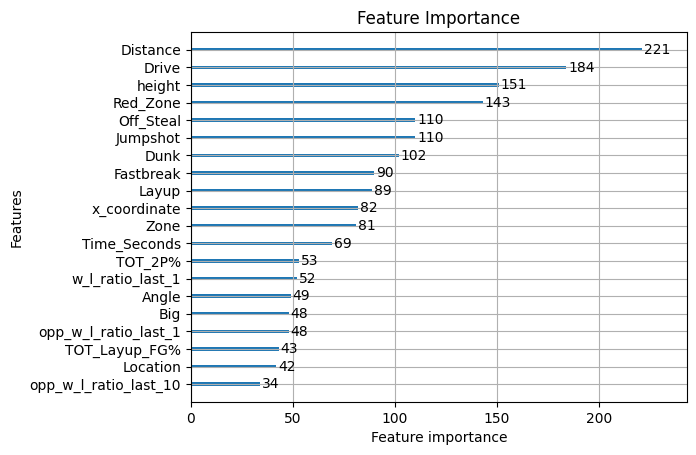

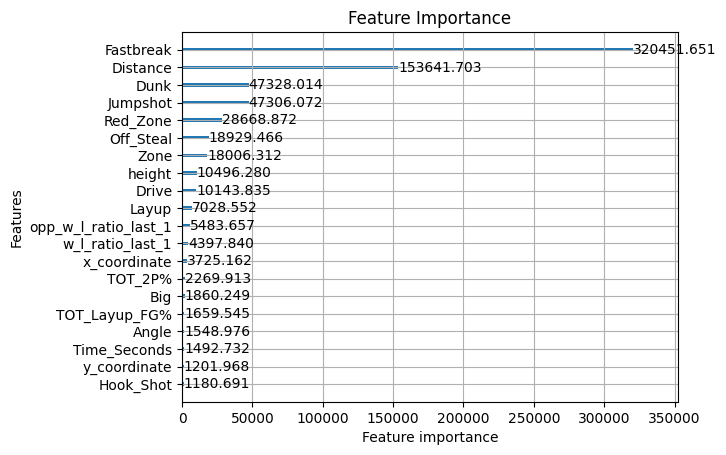

In [ ]:
lgb.plot_importance(bst, importance_type='split', max_num_features=20)
plt.title("Feature Importance")
lgb.plot_importance(bst, importance_type='gain', max_num_features=20)
plt.title("Feature Importance")

In [44]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import pandas as pd

# Assuming your DataFrame is named 'merged_df_two_pointers'
# Drop the columns you do not want to include in the model
X = merged_df_with_3P.drop([
    'game_id', 'team_id', 'team_id', 'season_id', 'player_id', 'shot_id', 'segment_id', 'date', 
    'has_locations', 'has_segments', 'team1', 'team2', 'hometeam', 'Made', 'Time', 'Stat', 'season', 
    'league', 'score','winning_team','Fastbreak','score_difference',
    'score_opp', 'And1', 'Blocked', 'Assisted', 
], axis=1)

categorical_features = ['Location', 'Zone','Period','LBA_position', 'year']

# Convert the columns to 'category' type
for col in categorical_features:
    X[col] = X[col].astype('category')

# Use 'Made' as the target variable
y = merged_df_with_3P['Made']


X.to_csv('X_3P.csv', index=False)
y.to_csv('y_3P.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#LIGHTGBM

# Create a LightGBM dataset and specify the categorical features
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_features)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_features)

# Set up LightGBM parameters
params = {
    'objective': 'binary',
    'metric': 'binary_error',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the model
num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

# Make predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Convert probabilities to binary outcomes
# y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

In [122]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

def find_best_threshold(y_true, y_pred_probs):
    thresholds = [i/100 for i in range(100)]  # This gives [0, 0.01, 0.02,...,0.99]
    best_threshold = 0
    best_f1 = 0
    
    for threshold in thresholds:
        y_pred_binary = [1 if x >= threshold else 0 for x in y_pred_probs]
        current_f1 = f1_score(y_true, y_pred_binary)
        
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
            
    return best_threshold

# Find the best threshold on the training data
y_train_pred = bst.predict(X_train, num_iteration=bst.best_iteration)
best_threshold = find_best_threshold(y_test, y_pred)

# Now, apply the best threshold to get binary predictions
y_train_pred_binary = [1 if x >= best_threshold else 0 for x in y_train_pred]
y_pred_binary = [1 if x >= best_threshold else 0 for x in y_pred]

# Performance Metrics for Train data
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
train_precision = precision_score(y_train, y_train_pred_binary)
train_recall = recall_score(y_train, y_train_pred_binary)
train_f1 = f1_score(y_train, y_train_pred_binary)
train_auc_roc = roc_auc_score(y_train, y_train_pred)

print('Train-------------------------------')
print(f"Train Accuracy: {train_accuracy}")
print(f"Train Precision: {train_precision}")
print(f"Train Recall: {train_recall}")
print(f"Train F1 Score: {train_f1}")
print(f"Train AUC ROC: {train_auc_roc}")

# Performance Metrics for Test data
test_accuracy = accuracy_score(y_test, y_pred_binary)
test_precision = precision_score(y_test, y_pred_binary)
test_recall = recall_score(y_test, y_pred_binary)
test_f1 = f1_score(y_test, y_pred_binary)
test_auc_roc = roc_auc_score(y_test, y_pred)

print('Test-------------------------------')
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Precision: {test_precision}")
print(f"Test Recall: {test_recall}")
print(f"Test F1 Score: {test_f1}")
print(f"Test AUC ROC: {test_auc_roc}")

# Displaying the best threshold
print(f"Optimum Threshold for Maximum F1 Score: {best_threshold}")


Train-------------------------------
Train Accuracy: 0.36535672023514143
Train Precision: 0.3469079939668175
Train Recall: 0.9807276909697871
Train F1 Score: 0.5125235480820682
Train AUC ROC: 0.6029275594452822
Test-------------------------------
Test Accuracy: 0.3611413302796068
Test Precision: 0.3445339790409654
Test Recall: 0.974841354523502
Test F1 Score: 0.5091287706588846
Test AUC ROC: 0.5596183662769814
Optimum Threshold for Maximum F1 Score: 0.26


In [123]:
print(np.mean(y_train))
print(np.mean(y_test))

0.3401820819177768
0.3398606737284092


Text(0.5, 1.0, 'Feature Importance')

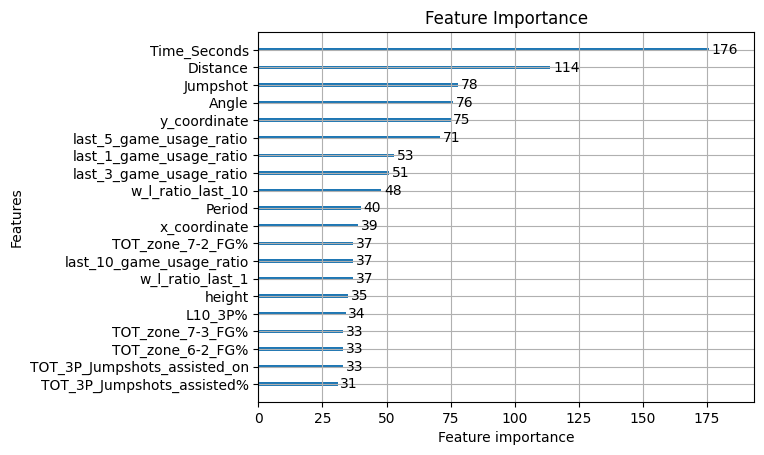

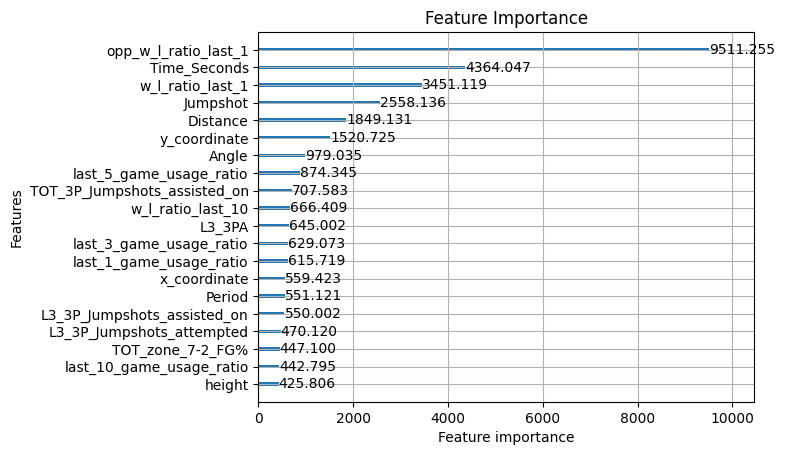

In [124]:
lgb.plot_importance(bst, importance_type='split', max_num_features=20)
plt.title("Feature Importance")
lgb.plot_importance(bst, importance_type='gain', max_num_features=20)
plt.title("Feature Importance")



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


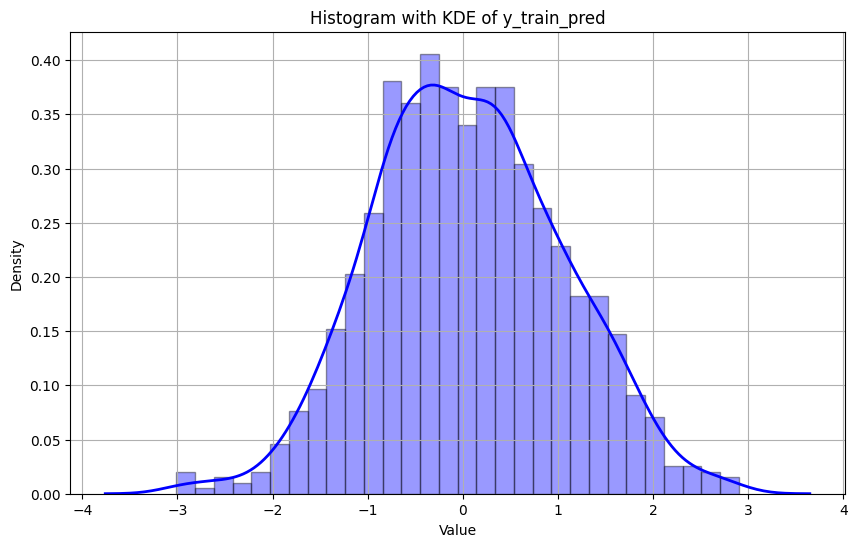

In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data, replace with your y_train_pred
y_train_pred = np.random.randn(1000)

# Create a histogram with KDE
plt.figure(figsize=(10,6))
sns.distplot(y_train_pred, hist=True, kde=True, bins=30, color='blue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.title('Histogram with KDE of y_train_pred')
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [125]:
#TO FIX

In [78]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

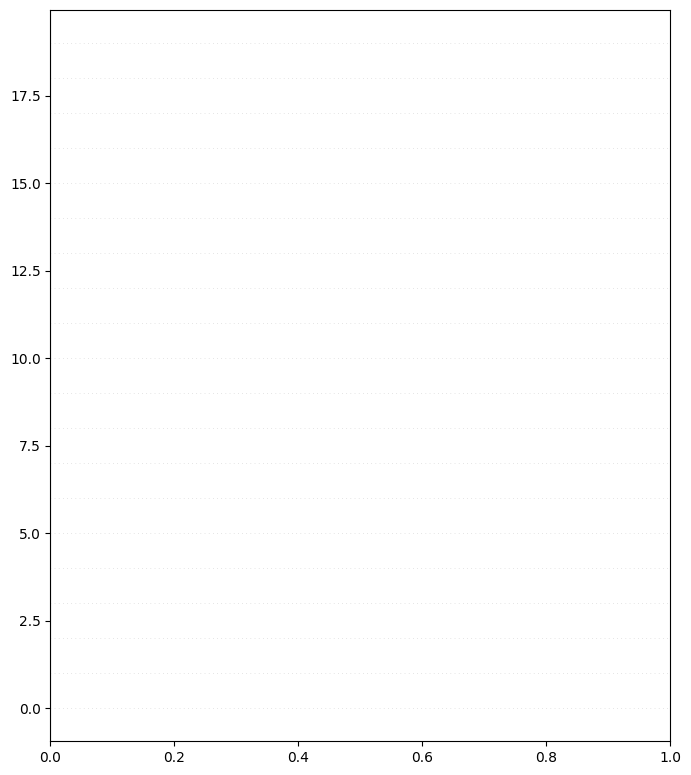

In [84]:
explainer = shap.TreeExplainer(bst)

# Compute SHAP values for all test set instances
shap_values = explainer.shap_values(X_train)
shap_values = shap_values[1]

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="violin")

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


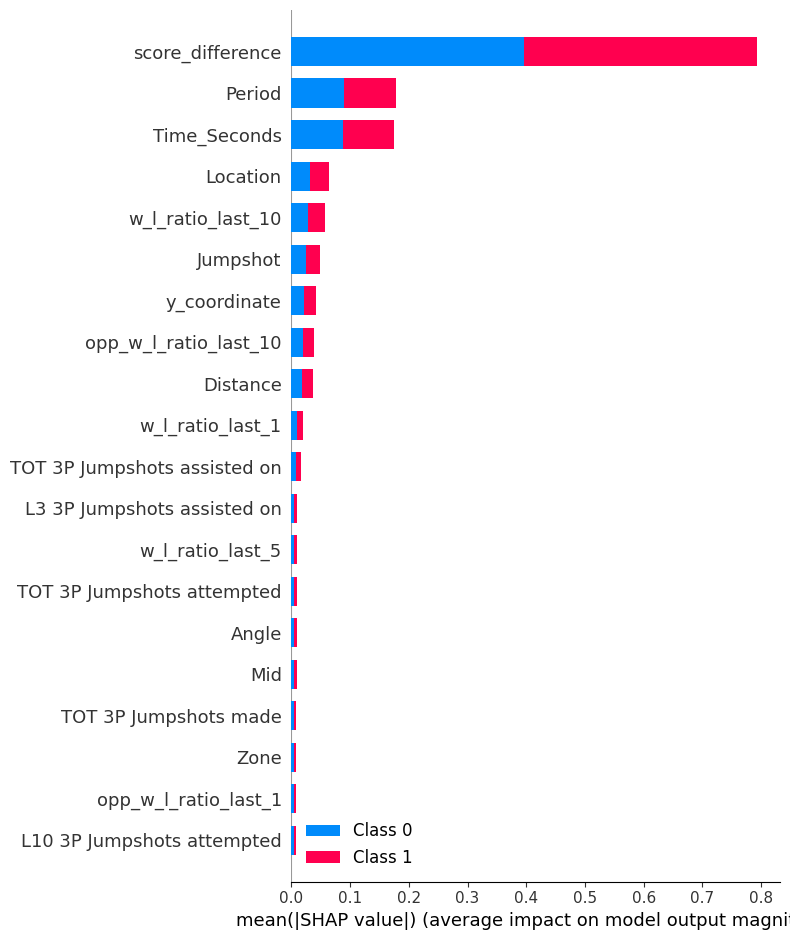

In [ ]:
# Compute SHAP values for all test set instances
shap_values = explainer.shap_values(X_test)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="violin"))

In [82]:
len(shap_values)

2

In [83]:
y_train.unique()

array([False,  True])